# Dataset description:
This dataset contains information on the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are currently registered with the Washington State Department of Licensing (DOL). This dataset was introduced as part of an official invitation-based competition on Kaggle. Our SVM model should answer the question "This is my car's model & make, along with a few other parameters, what price can this vehicle be bought or sold

### Column Description
- id – Unique identifier for each vehicle record.
- vin_(1-10) – The first 10 characters of the Vehicle Identification Number (VIN), which helps identify the vehicle manufacturer, model, and year.
- county – The county in Washington where the vehicle is registered.
- city – The city in Washington where the vehicle is registered.
- state – The state where the vehicle is registered (should be "WA" for Washington).
- zip_code – The ZIP code of the vehicle’s registered location.
- model_year – The manufacturing year of the vehicle.
- make – The brand or manufacturer of the vehicle (e.g., Tesla, Nissan, Chevrolet).
- model – The specific model of the vehicle (e.g., Model 3, Leaf, Volt).
- electric_vehicle_type – Specifies whether the vehicle is a Battery Electric Vehicle (BEV) or a Plug-in Hybrid Electric Vehicle (PHEV).
- clean_alternative_fuel_vehicle_(cafv)_eligibility – Indicates whether the vehicle qualifies for Washington’s Clean Alternative Fuel Vehicle (CAFV) program, which provides incentives for eco-friendly vehicles.
- electric_range – The estimated maximum miles the vehicle can travel on electric power alone before switching to fuel (for PHEVs) or requiring a recharge (for BEVs).
- base_msrp – The Manufacturer's Suggested Retail Price (MSRP) at the time of purchase.
- legislative_district – The Washington State legislative district where the vehicle is registered.
- dol_vehicle_id – A unique vehicle identification number assigned by the Washington State Department of Licensing (DOL).
- vehicle_location – The general geographic location of the registered vehicle (may be anonymized for privacy).
- electric_utility – The name of the electric utility provider that supplies electricity to the vehicle owner’s location.
- expected_price_($1k) – The estimated market price of the vehicle in thousands of dollars.


In [1]:
# import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data Exploration

In [3]:
# loading in our data
df = pd.read_csv('Electric_cars_dataset.csv')
df.head()

,ID,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,Expected Price ($1k)
0,EV33174,5YJ3E1EC6L,Snohomish,LYNNWOOD,WA,98037.0,2020.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,32.0,109821694,POINT (-122.287614 47.83874),PUGET SOUND ENERGY INC,50
1,EV40247,JN1AZ0CP8B,Skagit,BELLINGHAM,WA,98229.0,2011.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,40.0,137375528,POINT (-122.414936 48.709388),PUGET SOUND ENERGY INC,15
2,EV12248,WBY1Z2C56F,Pierce,TACOMA,WA,98422.0,2015.0,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81,0,27.0,150627382,POINT (-122.396286 47.293138),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,18
3,EV55713,1G1RD6E44D,King,REDMOND,WA,98053.0,2013.0,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,45.0,258766301,POINT (-122.024951 47.670286),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),33.9
4,EV28799,1G1FY6S05K,Pierce,PUYALLUP,WA,98375.0,2019.0,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,25.0,296998138,POINT (-122.321062 47.103797),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,41.78


In [4]:
#checking the number of rows and columns
df.shape

(64353, 18)

In [5]:
# checking for null values in our columns
df.isnull().sum()

ID                                                     0
VIN (1-10)                                             0
County                                                 4
City                                                   9
State                                                 11
ZIP Code                                               6
Model Year                                             7
Make                                                   4
Model                                                 13
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 169
DOL Vehicle ID                                         0
Vehicle Location                                     510
Electric Utility                                     722
Expected Price ($1k)           

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64353 entries, 0 to 64352
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 64353 non-null  object 
 1   VIN (1-10)                                         64353 non-null  object 
 2   County                                             64349 non-null  object 
 3   City                                               64344 non-null  object 
 4   State                                              64342 non-null  object 
 5   ZIP Code                                           64347 non-null  float64
 6   Model Year                                         64346 non-null  float64
 7   Make                                               64349 non-null  object 
 8   Model                                              64340 non-null  object 
 9   Electr

In [7]:
# checking numericsl statistics of the numerical columns
df.describe()

,ZIP Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID
count,64347.000000,64346.000000,64353.000000,64353.000000,64184.000000,6.435300e+04
mean,98143.452888,2018.186212,106.948985,2524.990754,29.951904,1.972905e+08
std,2856.064329,2.726742,104.093919,12402.895104,14.661124,1.069466e+08
min,745.000000,1993.000000,0.000000,0.000000,0.000000,4.385000e+03
25%,98052.000000,2017.000000,14.000000,0.000000,19.000000,1.372865e+08
50%,98121.000000,2018.000000,73.000000,0.000000,34.000000,1.753776e+08
75%,98370.000000,2021.000000,215.000000,0.000000,43.000000,2.299039e+08
max,99701.000000,2022.000000,337.000000,845000.000000,49.000000,4.789346e+08


In [8]:
# checking for duplicates
df[df.duplicated()]

,ID,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,Expected Price ($1k)


In [9]:
# confirming the anomalies in the column names
df.columns

Index(['ID', 'VIN (1-10)', 'County', 'City', 'State', 'ZIP Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', 'Expected Price ($1k)'],
      dtype='object')

In [10]:
df.dtypes

ID                                                    object
VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
ZIP Code                                             float64
Model Year                                           float64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility        

In [11]:
# checking the unique values of all columns using FOR loop
for col in df.columns:
    print(f"Column '{col}' has {df[col].nunique()} unique values.")

Column 'ID' has 64353 unique values.
Column 'VIN (1-10)' has 5644 unique values.
Column 'County' has 139 unique values.
Column 'City' has 544 unique values.
Column 'State' has 38 unique values.
Column 'ZIP Code' has 678 unique values.
Column 'Model Year' has 19 unique values.
Column 'Make' has 34 unique values.
Column 'Model' has 107 unique values.
Column 'Electric Vehicle Type' has 2 unique values.
Column 'Clean Alternative Fuel Vehicle (CAFV) Eligibility' has 3 unique values.
Column 'Electric Range' has 98 unique values.
Column 'Base MSRP' has 37 unique values.
Column 'Legislative District' has 50 unique values.
Column 'DOL Vehicle ID' has 64353 unique values.
Column 'Vehicle Location' has 668 unique values.
Column 'Electric Utility' has 68 unique values.
Column 'Expected Price ($1k)' has 210 unique values.


# Data Cleaning

In [13]:
# replacing the empty spaces in the column names whith underscore and turning all to lower case
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [14]:
# dropping all rows with null values
new_df = df.dropna()

In [15]:
# confirming there are no null values again
new_df.isnull().sum()

id                                                   0
vin_(1-10)                                           0
county                                               0
city                                                 0
state                                                0
zip_code                                             0
model_year                                           0
make                                                 0
model                                                0
electric_vehicle_type                                0
clean_alternative_fuel_vehicle_(cafv)_eligibility    0
electric_range                                       0
base_msrp                                            0
legislative_district                                 0
dol_vehicle_id                                       0
vehicle_location                                     0
electric_utility                                     0
expected_price_($1k)                                 0
dtype: int

In [17]:
# converting columns like model_year, zip_code, and legislative_district back to int column
new_df[new_df.select_dtypes('float64').columns] = new_df.select_dtypes('float64').astype('int64')

In [21]:
# converting the 'expected_price_($1k)' column to float 
new_df['expected_price_($1k)'] = pd.to_numeric(new_df['expected_price_($1k)'])

In [29]:
new_df.describe()

,zip_code,model_year,electric_range,base_msrp,legislative_district,dol_vehicle_id,expected_price_($1k)
count,63081.000000,63081.000000,63081.000000,63081.000000,63081.000000,6.308100e+04,63081.000000
mean,98252.381827,2018.187109,107.088569,2529.523866,30.060383,1.973738e+08,45.476095
std,330.715600,2.725192,104.111828,12431.057011,14.665353,1.070546e+08,24.757155
min,59937.000000,1993.000000,0.000000,0.000000,0.000000,4.385000e+03,0.000000
25%,98052.000000,2017.000000,14.000000,0.000000,20.000000,1.373311e+08,22.857000
50%,98119.000000,2018.000000,73.000000,0.000000,34.000000,1.754003e+08,40.000000
75%,98368.000000,2021.000000,215.000000,0.000000,43.000000,2.300375e+08,67.070000
max,99403.000000,2022.000000,337.000000,845000.000000,49.000000,4.789346e+08,1100.000000


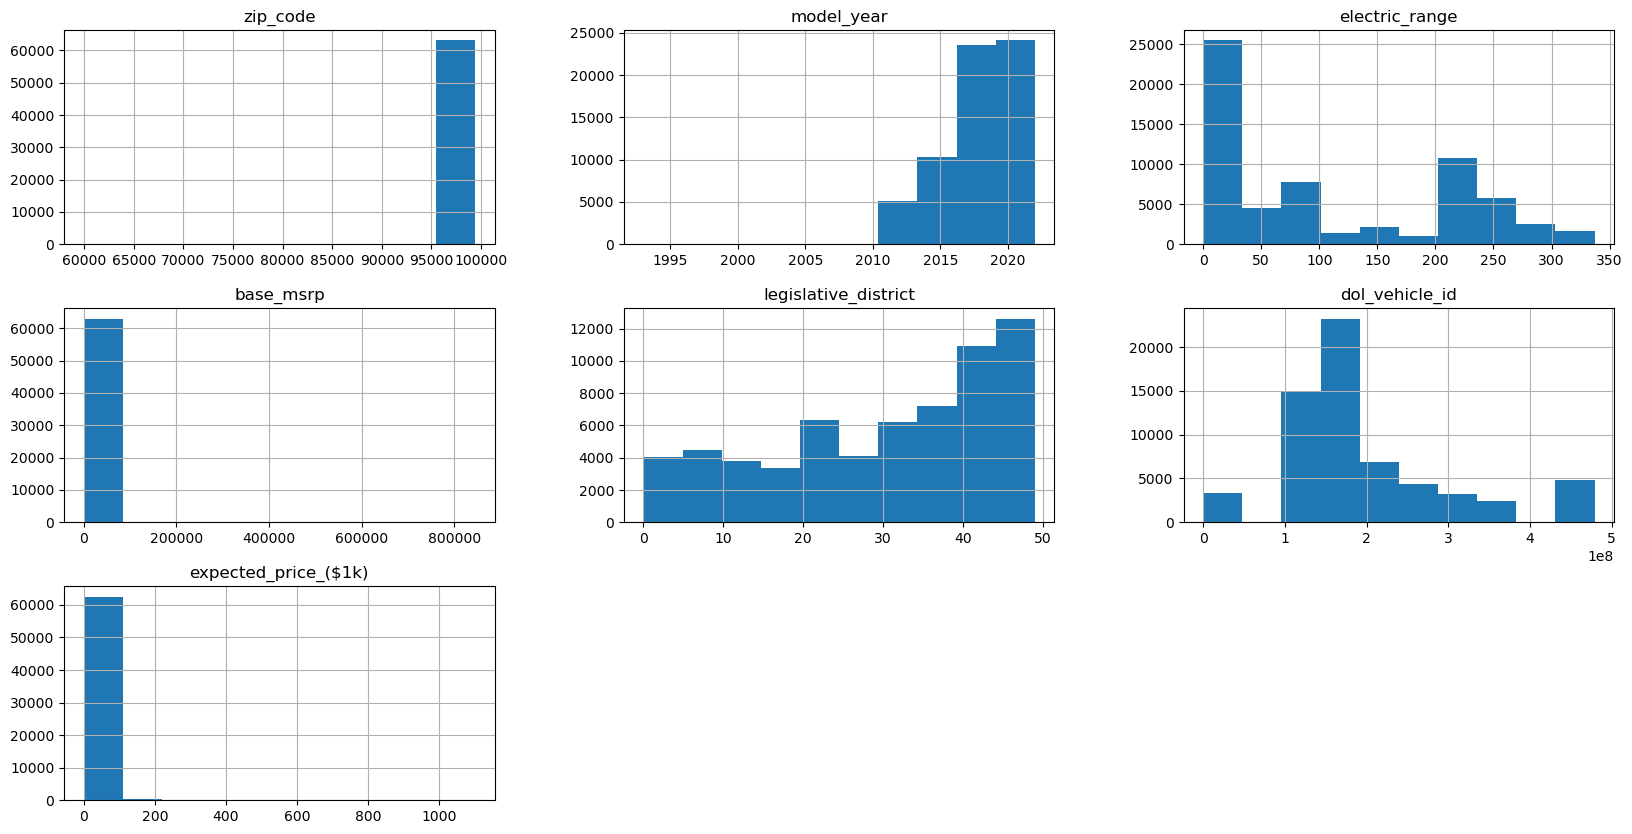

In [34]:
# histogram distribution of the numeric columns
new_df.select_dtypes('number').hist(figsize=(20,10));

In [37]:
# checking the correlation of all numeric columns to the target column
new_df.select_dtypes("number").corr()['expected_price_($1k)']

zip_code               -0.087692
model_year              0.537750
electric_range          0.213697
base_msrp              -0.080139
legislative_district    0.056133
dol_vehicle_id         -0.023765
expected_price_($1k)    1.000000
Name: expected_price_($1k), dtype: float64

# Feature Selection

In [40]:
# selecting the needed the columns
trim_df = new_df[['electric_vehicle_type', 'clean_alternative_fuel_vehicle_(cafv)_eligibility', 'make', 'model_year', 'electric_range', 'expected_price_($1k)']]

In [42]:
trim_df.head(2)

,electric_vehicle_type,clean_alternative_fuel_vehicle_(cafv)_eligibility,make,model_year,electric_range,expected_price_($1k)
0,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,TESLA,2020,308,50.0
1,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,NISSAN,2011,73,15.0


In [44]:
trim_df.select_dtypes("number").corr()['expected_price_($1k)']

model_year              0.537750
electric_range          0.213697
expected_price_($1k)    1.000000
Name: expected_price_($1k), dtype: float64

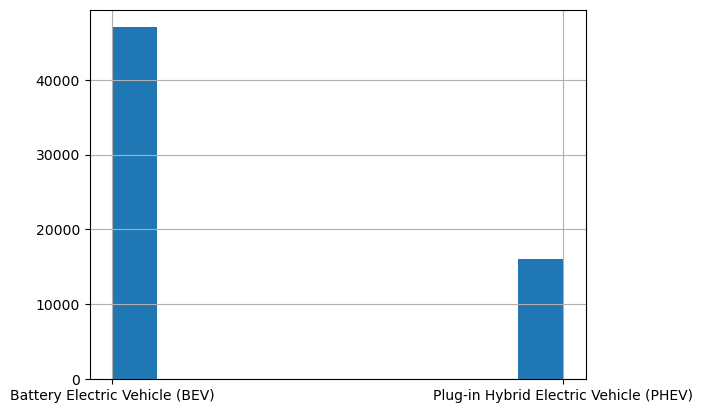

In [46]:
ax =trim_df['electric_vehicle_type'].hist()

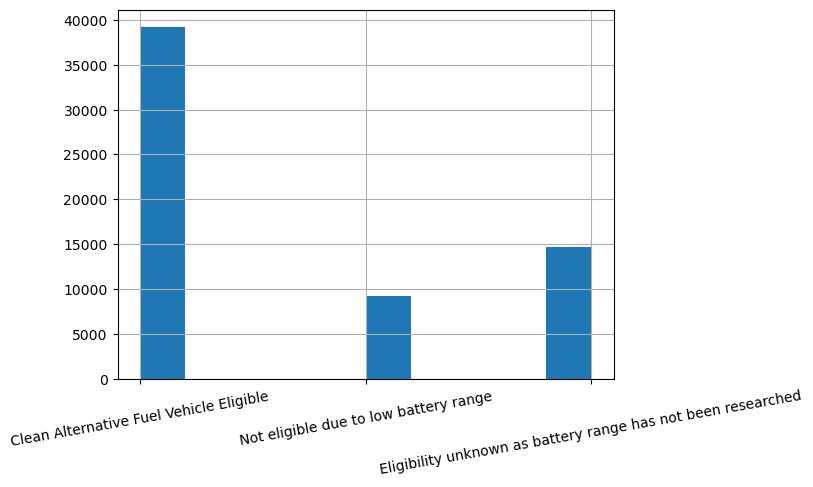

In [48]:
ax=trim_df['clean_alternative_fuel_vehicle_(cafv)_eligibility'].hist(xrot=10)

In [50]:
# getting dummies for the categorical variables
dummies_df = pd.get_dummies(trim_df, drop_first=True)
dummies_df.head(2)

,model_year,electric_range,expected_price_($1k),electric_vehicle_type_Plug-in Hybrid Electric Vehicle (PHEV),clean_alternative_fuel_vehicle_(cafv)_eligibility_Eligibility unknown as battery range has not been researched,clean_alternative_fuel_vehicle_(cafv)_eligibility_Not eligible due to low battery range,make_AZURE DYNAMICS,make_BENTLEY,make_BMW,make_CADILLAC,...,make_PORSCHE,make_RIVIAN,make_SMART,make_SUBARU,make_TESLA,make_TH!NK,make_TOYOTA,make_VOLKSWAGEN,make_VOLVO,make_WHEEGO ELECTRIC CARS
0,2020,308,50.0,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,2011,73,15.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [52]:
# renaming some long column names 
dummies_df.rename(columns={
                    'electric_vehicle_type_Plug-in Hybrid Electric Vehicle (PHEV)':'hybrid_electric_vehicle',
                   'clean_alternative_fuel_vehicle_(cafv)_eligibility_Eligibility unknown as battery range has not been researched':\
                    'cafv_eligibility_unknown',
                    'clean_alternative_fuel_vehicle_(cafv)_eligibility_Not eligible due to low battery range':'cafv_not_eligible'
                      }, inplace=True)

In [54]:
dummies_df.head(2)

,model_year,electric_range,expected_price_($1k),hybrid_electric_vehicle,cafv_eligibility_unknown,cafv_not_eligible,make_AZURE DYNAMICS,make_BENTLEY,make_BMW,make_CADILLAC,...,make_PORSCHE,make_RIVIAN,make_SMART,make_SUBARU,make_TESLA,make_TH!NK,make_TOYOTA,make_VOLKSWAGEN,make_VOLVO,make_WHEEGO ELECTRIC CARS
0,2020,308,50.0,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,2011,73,15.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [56]:
dummies_df.describe()

,model_year,electric_range,expected_price_($1k)
count,63081.000000,63081.000000,63081.000000
mean,2018.187109,107.088569,45.476095
std,2.725192,104.111828,24.757155
min,1993.000000,0.000000,0.000000
25%,2017.000000,14.000000,22.857000
50%,2018.000000,73.000000,40.000000
75%,2021.000000,215.000000,67.070000
max,2022.000000,337.000000,1100.000000


# Removing Outliers Using IQR

In [59]:
# getting the 25 and 75 percentile as 
Q1 = dummies_df[['electric_range', 'expected_price_($1k)']].quantile(0.25)
Q3 = dummies_df[['electric_range', 'expected_price_($1k)']].quantile(0.75)
IQR = Q3 - Q1

In [61]:
print(Q3)

electric_range          215.00
expected_price_($1k)     67.07
Name: 0.75, dtype: float64


In [63]:
print(Q1)

electric_range          14.000
expected_price_($1k)    22.857
Name: 0.25, dtype: float64


In [65]:
print(IQR)

electric_range          201.000
expected_price_($1k)     44.213
dtype: float64


In [67]:
# Determine outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [69]:
print(lower_bound)

electric_range         -287.5000
expected_price_($1k)    -43.4625
dtype: float64


In [71]:
print(upper_bound)

electric_range          516.5000
expected_price_($1k)    133.3895
dtype: float64


In [73]:
filtered_df = dummies_df.loc[
    (dummies_df["electric_range"] >= lower_bound[0]) & (dummies_df["electric_range"] <= upper_bound[0]) &
    (dummies_df["expected_price_($1k)"] >= lower_bound[1]) & (dummies_df["expected_price_($1k)"] <= upper_bound[1])
]

In [75]:
filtered_df.head()

,model_year,electric_range,expected_price_($1k),hybrid_electric_vehicle,cafv_eligibility_unknown,cafv_not_eligible,make_AZURE DYNAMICS,make_BENTLEY,make_BMW,make_CADILLAC,...,make_PORSCHE,make_RIVIAN,make_SMART,make_SUBARU,make_TESLA,make_TH!NK,make_TOYOTA,make_VOLKSWAGEN,make_VOLVO,make_WHEEGO ELECTRIC CARS
0,2020,308,50.00,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,2011,73,15.00,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2015,81,18.00,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,2013,38,33.90,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2019,238,41.78,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Normalization

In [78]:
# importing the scaler library
from sklearn.preprocessing import MinMaxScaler

In [80]:
# instantiating the model
scaler = MinMaxScaler()

In [82]:
# fit and transform the filtered df
scaled_array = scaler.fit_transform(filtered_df)

In [84]:
scaled_array[:2]

array([[0.91304348, 0.91394659, 0.40032026, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.52173913, 0.21661721, 0.12009608, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0. 

In [86]:
# turning the array into a DataFrame
scaled_df = pd.DataFrame(scaled_array, columns=filtered_df.columns)

In [88]:
scaled_df.head()

,model_year,electric_range,expected_price_($1k),hybrid_electric_vehicle,cafv_eligibility_unknown,cafv_not_eligible,make_AZURE DYNAMICS,make_BENTLEY,make_BMW,make_CADILLAC,...,make_PORSCHE,make_RIVIAN,make_SMART,make_SUBARU,make_TESLA,make_TH!NK,make_TOYOTA,make_VOLKSWAGEN,make_VOLVO,make_WHEEGO ELECTRIC CARS
0,0.913043,0.913947,0.400320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.521739,0.216617,0.120096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.695652,0.240356,0.144115,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.608696,0.112760,0.271417,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.869565,0.706231,0.334508,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
scaled_df.describe()

,model_year,electric_range,expected_price_($1k),hybrid_electric_vehicle,cafv_eligibility_unknown,cafv_not_eligible,make_AZURE DYNAMICS,make_BENTLEY,make_BMW,make_CADILLAC,...,make_PORSCHE,make_RIVIAN,make_SMART,make_SUBARU,make_TESLA,make_TH!NK,make_TOYOTA,make_VOLKSWAGEN,make_VOLVO,make_WHEEGO ELECTRIC CARS
count,62692.000000,62692.000000,62692.000000,62692.000000,62692.000000,62692.000000,62692.000000,62692.000000,62692.000000,62692.000000,...,62692.000000,62692.000000,62692.000000,62692.000000,62692.000000,62692.000000,62692.000000,62692.000000,62692.000000,62692.000000
mean,0.833458,0.319733,0.359057,0.256428,0.227685,0.147515,0.000032,0.000016,0.042254,0.001069,...,0.007162,0.000415,0.003031,0.000510,0.431905,0.000016,0.041999,0.018870,0.010783,0.000016
std,0.118274,0.308882,0.183719,0.436664,0.419341,0.354621,0.005648,0.003994,0.201170,0.032674,...,0.084326,0.020361,0.054969,0.022587,0.495345,0.003994,0.200588,0.136067,0.103280,0.003994
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.782609,0.041543,0.183002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.826087,0.222552,0.320256,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.956522,0.637982,0.520416,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Training and Testing

In [93]:
# import the train test split package
from sklearn.model_selection import train_test_split

In [95]:
# Assigning the X and y
X = filtered_df.drop('expected_price_($1k)', axis=1)
y = filtered_df['expected_price_($1k)']

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
# printing the length of the train and test folds
print(len(X_train), len(X_test), len(y_train), len(y_test))

50153 12539 50153 12539


# Modelling

In [102]:
# import the model libraries
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [104]:
model = {'linear regression': LinearRegression(),
        'GradientBoostingRegressor': GradientBoostingRegressor(),
        'Random forest': RandomForestRegressor(),
         'Decision Tree': DecisionTreeRegressor(),
         # 'SVR': SVR()
        }

for key, value in model.items():
    print(key, ':', np.mean(cross_val_score(value, X, y)))

linear regression : 0.8263998332341874
GradientBoostingRegressor : 0.9379255794199184
Random forest : 0.9868274893101535
Decision Tree : 0.9869099388794902


#### After multiple modelling using the SVR() and constantly giving negative score, i've decided to try out other models and it happens that Decision tree did best

# Accuracy Metric

In [133]:
# importing the accuracy metric library
from sklearn.metrics import mean_squared_error

In [119]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [123]:
y_pred = model.predict(X_test)

In [125]:
y_pred[:5]

array([20.004     , 15.        , 40.        , 24.23095975, 50.        ])

In [127]:
y_test[:5]

58977    20.004
5021     15.000
63718    40.000
40390    25.000
47702    50.000
Name: expected_price_($1k), dtype: float64

In [135]:
mse = mean_squared_error(y_test, y_pred)
mse

7.541370867702425

In [141]:
# root mean squared error
rmse = np.sqrt(mse)
rmse

2.7461556524899358